## **Práctica 1**

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 

### **Primera parte**

In [469]:
estatura = pd.read_excel('Estaturas.xlsx', 'normales')
estatura['estatura_converted'] = estatura['Estatura(metros)']/10
estatura['edad_converted'] = estatura['Edad(años)']/100
estatura['color'] = 'k'
estatura.head(5)

,Estatura(metros),Edad(años),estatura_converted,edad_converted,color
0,1.77,26,0.177,0.26,k
1,1.74,31,0.174,0.31,k
2,1.72,24,0.172,0.24,k
3,1.78,34,0.178,0.34,k
4,1.65,32,0.165,0.32,k


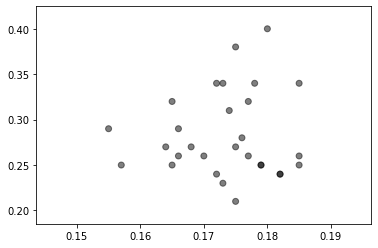

In [316]:
plt.scatter(estatura['estatura_converted'], estatura['edad_converted'], color = estatura['color'], alpha=0.5)
plt.show()

### **K-means (Hard-clustering)**

#### Función para calcular centroides aleatorios con un K específico

In [317]:
def get_centroides(k):
    centroides = []
    for i in range(k):
        centroides.append([np.random.uniform(0.16, 0.185), np.random.uniform(0.2, 0.4)])
    return centroides

#### Función para graficar observaciones

In [318]:
def plot_points(data, c, text):
    plt.scatter(data['estatura_converted'], data['edad_converted'], color=data['color'], alpha=0.5)
    for i in range(0,len(c)):
        plt.scatter(c[i][0], c[i][1], marker='*', color=color_map[i+1])

    plt.title(text)
    plt.xlim(0.15, 0.19)
    plt.ylim(0.20, 0.41)
    plt.show()

#### Función para calcular distancia de las observaciones al centroide

In [319]:
def calcular_dist(data, c):
    
    for i in range(0,len(c)):
        data['distancia'+str(i)] = np.sqrt((data['estatura_converted'] - c[i][0]) ** 2 + (data['edad_converted'] - c[i][1]) ** 2 )
    
    distancia_centroide = ['distancia'+str(x) for x in range(0,len(centroides))]
    data['centroide_cercano'] = data.loc[:, distancia_centroide].idxmin(axis=1)
    data['centroide_cercano'] = data['centroide_cercano'].map(lambda x: int(x.lstrip('distancia')))
    data['color'] = data['centroide_cercano'].map(lambda x: color_map[x+1])
    
    return data

#### Función para promediar centroides

In [320]:
def actualizar_centroide(data, c):
    for i in range(0,len(c)):
        c[i][0] = np.mean(data[data['centroide_cercano'] == i]['estatura_converted'])
        c[i][1] = np.mean(data[data['centroide_cercano'] == i]['edad_converted'])
    return c

#### Algoritmo K-means

In [321]:
def k_means(data, c, iters, flag_plot_iter):
    promedio_centroides = c
    for i in range(0, iters):
        data_dist = calcular_dist(data, promedio_centroides)
        promedio_centroides = actualizar_centroide(data_dist, promedio_centroides)
        if flag_plot_iter:            
            plot_points(data_dist, promedio_centroides, "Iteración: "+str(i+1))
            
    plot_points(data_dist, promedio_centroides, "Convergencia")

#### Calculando centroides aleatorios con k=2

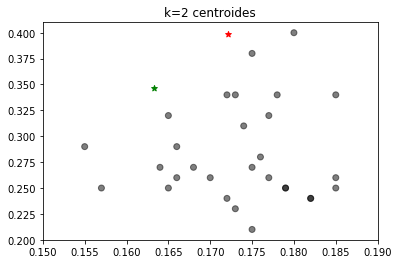

In [368]:
color_map = {1: 'red', 2: 'green', 3: 'blue', 4:'yellow', 5:'purple', 6:'lightblue', 7:'gray'}
k=2
centroides = get_centroides(k)
plot_points(estatura, centroides, "k="+str(k)+" centroides")

#### Ejecución de Algoritmo K-means

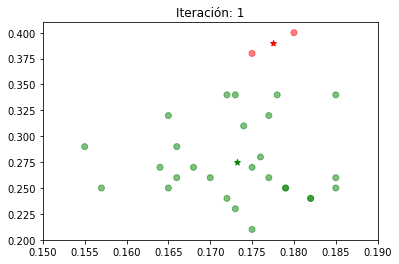

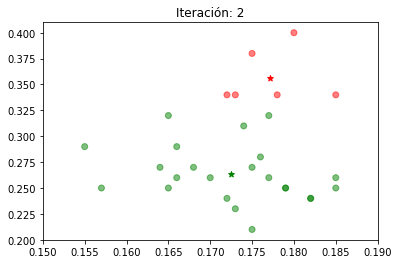

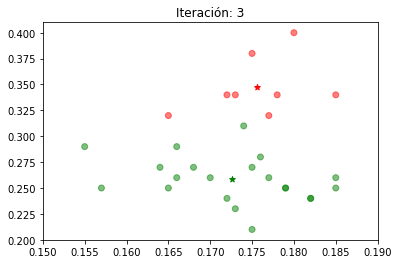

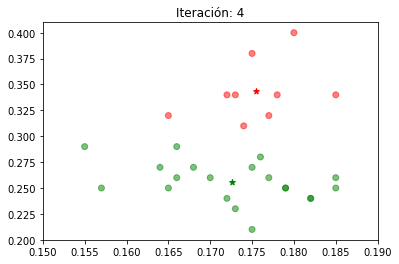

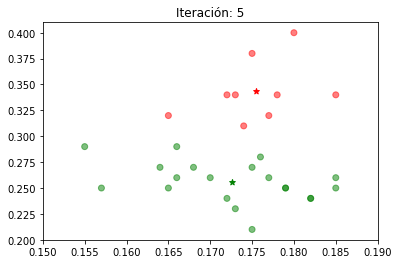

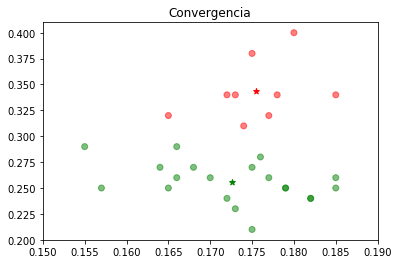

In [369]:
k_means(estatura, centroides, 5, True)

#### **Experimentos con diferentes k**

#### k=3

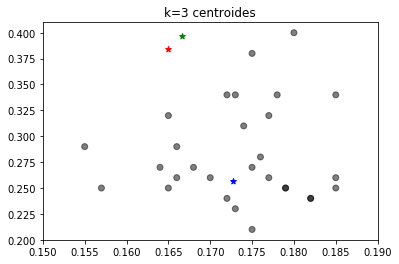

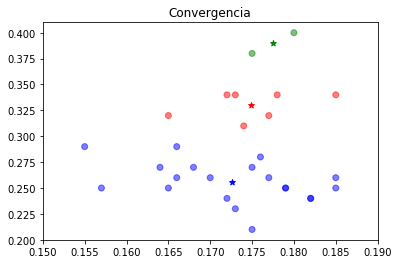

In [371]:
k=3
centroides = get_centroides(k)
plot_points(estatura, centroides, "k="+str(k)+" centroides")
k_means(estatura, centroides, 20, False)

#### k=4

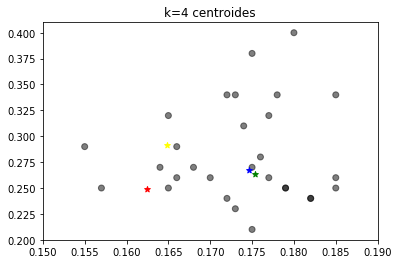

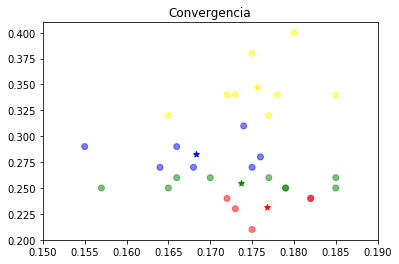

In [373]:
k=4
centroides = get_centroides(k)
plot_points(estatura, centroides, "k="+str(k)+" centroides")
k_means(estatura, centroides, 20, False)

#### k=5

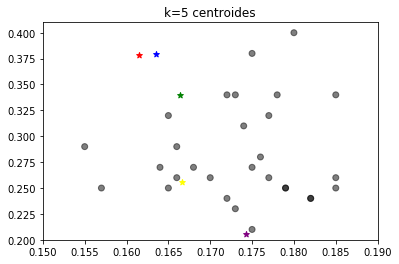

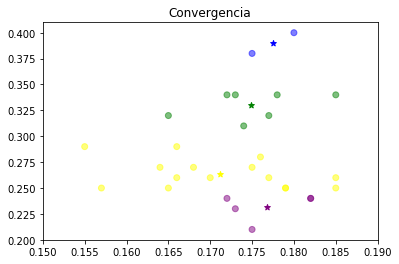

In [375]:
k=5
centroides = get_centroides(k)
plot_points(estatura, centroides, "k="+str(k)+" centroides")
k_means(estatura, centroides, 20, False)

#### k=6

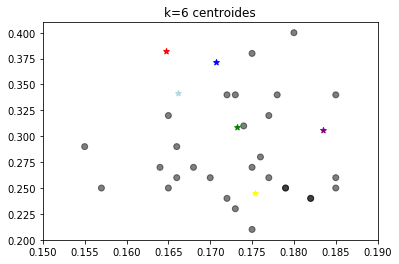

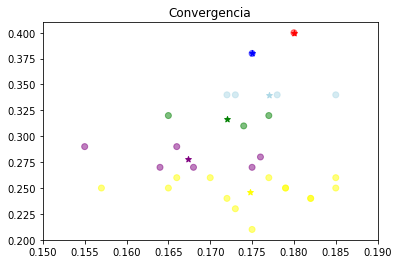

In [379]:
k=6
centroides = get_centroides(k)
plot_points(estatura, centroides, "k="+str(k)+" centroides")
k_means(estatura, centroides, 20, False)

#### k=7

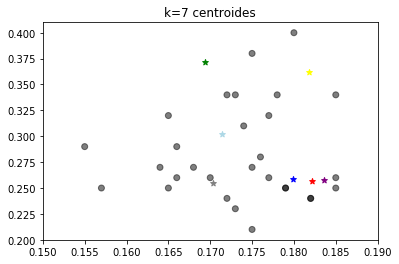

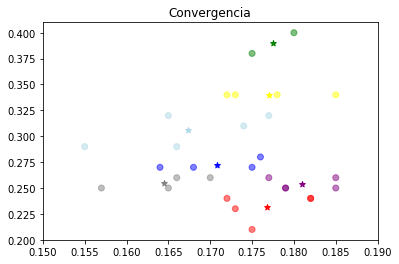

In [385]:
k=7
centroides = get_centroides(k)
plot_points(estatura, centroides, "k="+str(k)+" centroides")
k_means(estatura, centroides, 20, False)

### **GMM (Soft-clustering)**

#### Función sklearn GMM

In [450]:
def gaussian_mixture_model(x, k):
    
    gmm = GaussianMixture(n_components = k)
    gmm.fit(x)
    labels = gmm.predict(x)
    x['labels']= labels
    
    for i in range(0,k):
        cluster = x[x['labels'] == i]
        plt.scatter(cluster['estatura_converted'], cluster['edad_converted'], c = color_map[i+1])

#### Features

In [459]:
x = estatura.iloc[:,2:4]

#### Experimentos con diferentes k

#### k=2

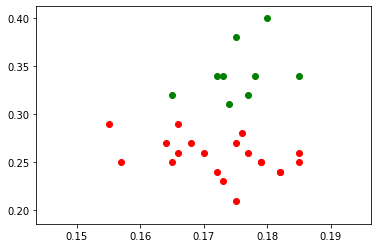

In [463]:
gaussian_mixture_model(x, 2)

#### k=3

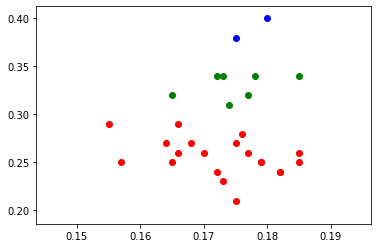

In [462]:
gaussian_mixture_model(x, 3)

#### k=4

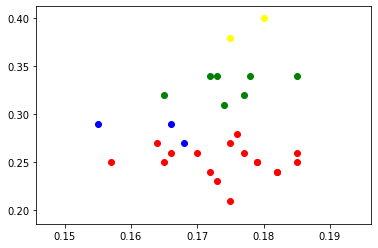

In [464]:
gaussian_mixture_model(x, 4)

#### k=5

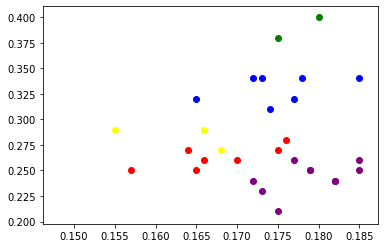

In [465]:
gaussian_mixture_model(x, 5)

#### k=6

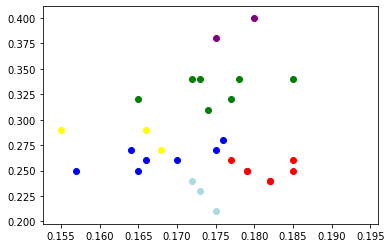

In [466]:
gaussian_mixture_model(x, 6)

#### k=7

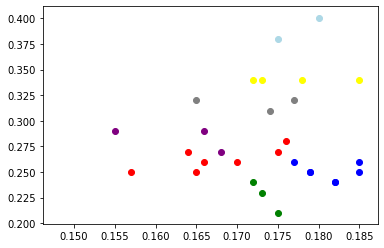

In [467]:
gaussian_mixture_model(x, 7)

### **Análisis**

Tomando de referencia el experimento con k=3 se puede observar que hay algunos clusters que pueden categorizarse de acuerdo a las edades, en el rango de edades 21-29 existen un primer clúster, en el rango 31-34 se categoriza el segundo y el último clúster para el resto de observaciones.

#### Método del Codo

Con relación al método del codo, de hecho para la implementación de k-means se recomienda utilizarlo a fin den encontrar la cantidad ideal de centroides.

### **Uso de nuevas observaciones**

In [471]:
x_test = pd.read_excel('Estaturas.xlsx', 'valtest(normales)')
x_test['estatura_converted'] = x_test['Estatura(metros)']/10
x_test['edad_converted'] = x_test['Edad(años)']/100
x_test['color'] = 'k'
x_test

,Estatura(metros),Edad(años),estatura_converted,edad_converted,color
0,1.82,25,0.182,0.25,k
1,1.80,27,0.180,0.27,k
2,1.60,31,0.160,0.31,k
3,1.60,35,0.160,0.35,k
4,1.82,30,0.182,0.30,k
5,1.76,32,0.176,0.32,k
6,1.79,31,0.179,0.31,k
7,1.61,31,0.161,0.31,k


### **k-means**

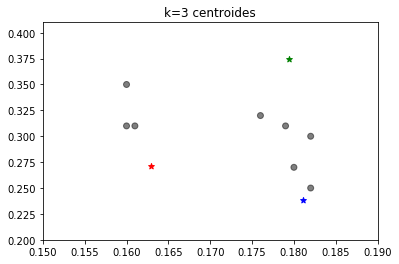

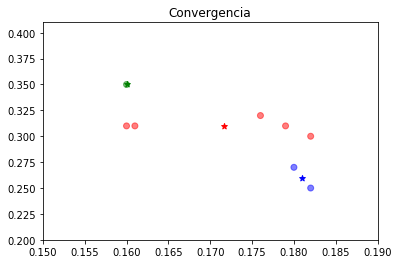

In [472]:
k=3
centroides = get_centroides(k)
plot_points(x_test, centroides, "k="+str(k)+" centroides")
k_means(x_test, centroides, 20, False)

### **GMM**

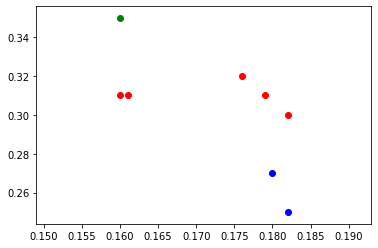

In [475]:
x = x_test.iloc[:,2:4]
gaussian_mixture_model(x, 3)

### **Segunda parte**

In [ ]:
estatura = pd.read_excel('Estaturas.xlsx', 'anomalias', dtype={'Estatura':float, 'Edad':float})
estatura